In [ ]:
import pandas as pd
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# This relates to plotting datetime values with matplotlib:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/insurance_dataset.csv.zip")

In [ ]:
df.describe()

,company_code,premiums,claims,claim_premium_ratio
count,8.338214e+06,8.338214e+06,8.338214e+06,3.171120e+06
mean,5.599980e+03,3.657988e+05,8.821046e+04,6.849516e+09
std,1.529373e+03,8.106201e+06,3.680646e+06,1.230906e+13
min,1.007000e+03,-2.240225e+08,-4.162418e+09,-6.590561e+15
25%,5.185000e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.886000e+03,0.000000e+00,0.000000e+00,0.000000e+00
75%,6.572000e+03,8.172960e+03,0.000000e+00,2.920000e-01
max,9.938000e+03,2.598854e+09,5.323648e+09,1.980445e+16


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8338214 entries, 0 to 8338213
Data columns (total 8 columns):
 #   Column               Dtype  
---  ------               -----  
 0   company_code         int64  
 1   company_name         object 
 2   year_month           object 
 3   product              object 
 4   state                object 
 5   premiums             float64
 6   claims               float64
 7   claim_premium_ratio  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 508.9+ MB


Data Cleaning

In [ ]:
df.shape

(8338214, 8)

In [ ]:
grouping_cnt = df.groupby(['company_code', 'product','state']).size()

In [ ]:
display(grouping_cnt)

company_code  product                         state
1007          0588 - DPVAT                    AC       132
                                              AL       132
                                              AM       132
                                              AP       132
                                              BA       132
                                                      ... 
9938          1392 - VGBL/VAGP/VRGP/VRSA/VRI  RS       142
                                              SC       142
                                              SE        25
                                              SP       143
                                              TO         6
Length: 109448, dtype: int64

In [ ]:
new = df.groupby(['company_code', 'product','state'])['premiums'].agg('count').reset_index()
sorted_result = new.sort_values(by='premiums',ascending=False).reset_index(drop=True)
display(sorted_result)


,company_code,product,state,premiums
0,5185,0993 - Vida em Grupo,SC,247
1,6785,0977 - Prestamista (exceto Habit e Rural),RJ,247
2,6220,0993 - Vida em Grupo,RO,247
3,6220,0993 - Vida em Grupo,RS,247
4,6220,0993 - Vida em Grupo,SC,247
...,...,...,...,...
109443,1490,0553 - R. C. Facultativa Veículos - RCFV,AC,1
109444,1490,0531 - Automóvel - Casco,TO,1
109445,1490,0531 - Automóvel - Casco,SE,1
109446,5215,0991 - Vida,RR,1


In [ ]:
new_grp = df.groupby(['company_code', 'product'])['premiums'].agg('count').reset_index()
sorted_result2 = new_grp.sort_values(by='premiums',ascending=False).reset_index(drop=True)
display(sorted_result2)

,company_code,product,premiums
0,6785,0993 - Vida em Grupo,6669
1,6785,0977 - Prestamista (exceto Habit e Rural),6669
2,6785,0114 - Compreensivo Residencial,6658
3,6785,0118 - Compreensivo Empresarial,6625
4,6831,0588 - DPVAT,6613
...,...,...,...
6916,6106,0819 - Crédito à Exp. Risco Comercial,1
6917,5690,1164 - Seguros Animais,1
6918,1775,0739 - Garantia Financeira,1
6919,5690,1102 - Seguro Agrícola com cob. do FESR,1


Code for Company code= 6785, product= Vida em Grupo and for different states

---



In [ ]:
# List of states to filter
states = ['TO', 'SP', 'RJ', 'MG', 'BA']

# Take user input
user_state = input("Enter state: ").strip().upper()

# Check if the input state is in the list
filtered_data_list = []

if user_state in states:
    filtered_df = df[
        (df['company_code'] == 6785) &
        (df['product'] == '0993 - Vida em Grupo') &
        (df['state'] == user_state)
    ]
    filtered_data_list.append(filtered_df)

# Display filtered data if any
if filtered_data_list:
    for data in filtered_data_list:
        display(data.sort_values(by='year_month'))
else:
    print("No data found for the entered state or invalid state input.")


Enter state: TO


,company_code,company_name,year_month,product,state,premiums,claims,claim_premium_ratio
3978304,6785,BRASILSEG COMPANHIA DE SEGUROS,2003-01-01,0993 - Vida em Grupo,TO,395538.21,753635.83,1.9053
3887395,6785,BRASILSEG COMPANHIA DE SEGUROS,2003-02-01,0993 - Vida em Grupo,TO,350585.32,-18774.77,-0.0536
3301979,6785,BRASILSEG COMPANHIA DE SEGUROS,2003-03-01,0993 - Vida em Grupo,TO,341913.07,9197.59,0.0269
3433311,6785,BRASILSEG COMPANHIA DE SEGUROS,2003-04-01,0993 - Vida em Grupo,TO,430244.94,37382.51,0.0869
2832376,6785,BRASILSEG COMPANHIA DE SEGUROS,2003-05-01,0993 - Vida em Grupo,TO,300114.46,102668.94,0.3421
...,...,...,...,...,...,...,...,...
7778991,6785,BRASILSEG COMPANHIA DE SEGUROS,2023-03-01,0993 - Vida em Grupo,TO,1175856.55,1057336.94,0.8992
6673773,6785,BRASILSEG COMPANHIA DE SEGUROS,2023-04-01,0993 - Vida em Grupo,TO,979077.86,175793.51,0.1796
8215496,6785,BRASILSEG COMPANHIA DE SEGUROS,2023-05-01,0993 - Vida em Grupo,TO,1162424.75,180581.67,0.1553
8201786,6785,BRASILSEG COMPANHIA DE SEGUROS,2023-06-01,0993 - Vida em Grupo,TO,1020401.49,331834.43,0.3252


Data preprocessing

In [ ]:
# Using .loc to avoid SettingWithCopyWarning
data.loc[:, 'year_month_f'] = pd.to_datetime(data['year_month'])



<ipython-input-10-e6c0b34beaf8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'year_month_f'] = pd.to_datetime(data['year_month'])


In [ ]:
data.dtypes

,0
company_code,int64
company_name,object
year_month,object
product,object
state,object
premiums,float64
claims,float64
claim_premium_ratio,float64
year_month_f,datetime64[ns]


In [ ]:
data.isna()

,company_code,company_name,year_month,product,state,premiums,claims,claim_premium_ratio,year_month_f
31948,False,False,False,False,False,False,False,False,False
105551,False,False,False,False,False,False,False,False,False
126200,False,False,False,False,False,False,False,False,False
154982,False,False,False,False,False,False,False,False,False
333477,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
8201786,False,False,False,False,False,False,False,False,False
8215496,False,False,False,False,False,False,False,False,False
8239799,False,False,False,False,False,False,False,False,False
8324919,False,False,False,False,False,False,False,False,False


In [ ]:
data.dtypes

,0
company_code,int64
company_name,object
year_month,object
product,object
state,object
premiums,float64
claims,float64
claim_premium_ratio,float64
year_month_f,datetime64[ns]


Handling dates

In [ ]:
data.set_index('year_month_f',inplace=True)

In [ ]:
data.drop("year_month",axis='columns',inplace=True)

<ipython-input-15-2622ce804a5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop("year_month",axis='columns',inplace=True)


In [ ]:
data.sort_index(inplace=True)

<ipython-input-16-b04fdf9a3b45>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_index(inplace=True)


In [ ]:
data.dtypes

,0
company_code,int64
company_name,object
product,object
state,object
premiums,float64
claims,float64
claim_premium_ratio,float64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 247 entries, 2003-01-01 to 2023-07-01
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company_code         247 non-null    int64  
 1   company_name         247 non-null    object 
 2   product              247 non-null    object 
 3   state                247 non-null    object 
 4   premiums             247 non-null    float64
 5   claims               247 non-null    float64
 6   claim_premium_ratio  246 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 15.4+ KB


In [ ]:
display(data)

,company_code,company_name,product,state,premiums,claims,claim_premium_ratio
year_month_f,,,,,,,
2003-01-01,6785,BRASILSEG COMPANHIA DE SEGUROS,0993 - Vida em Grupo,TO,395538.21,753635.83,1.9053
2003-02-01,6785,BRASILSEG COMPANHIA DE SEGUROS,0993 - Vida em Grupo,TO,350585.32,-18774.77,-0.0536
2003-03-01,6785,BRASILSEG COMPANHIA DE SEGUROS,0993 - Vida em Grupo,TO,341913.07,9197.59,0.0269
2003-04-01,6785,BRASILSEG COMPANHIA DE SEGUROS,0993 - Vida em Grupo,TO,430244.94,37382.51,0.0869
2003-05-01,6785,BRASILSEG COMPANHIA DE SEGUROS,0993 - Vida em Grupo,TO,300114.46,102668.94,0.3421
...,...,...,...,...,...,...,...
2023-03-01,6785,BRASILSEG COMPANHIA DE SEGUROS,0993 - Vida em Grupo,TO,1175856.55,1057336.94,0.8992
2023-04-01,6785,BRASILSEG COMPANHIA DE SEGUROS,0993 - Vida em Grupo,TO,979077.86,175793.51,0.1796
2023-05-01,6785,BRASILSEG COMPANHIA DE SEGUROS,0993 - Vida em Grupo,TO,1162424.75,180581.67,0.1553


In [ ]:
data.dtypes

,0
company_code,int64
company_name,object
product,object
state,object
premiums,float64
claims,float64
claim_premium_ratio,float64


In [ ]:
data = data.asfreq("MS")

In [ ]:
missing_values = data.isna().sum()

print(missing_values)

company_code           0
company_name           0
product                0
state                  0
premiums               0
claims                 0
claim_premium_ratio    1
dtype: int64


In [ ]:
data.shape

(247, 7)

Outlier handling for target column premiums

In [ ]:
print(data['premiums'].describe())
print(data['premiums'].unique())

count    2.470000e+02
mean     7.236941e+05
std      2.842315e+05
min     -5.168360e+03
25%      5.342944e+05
50%      7.200460e+05
75%      8.790049e+05
max      2.400056e+06
Name: premiums, dtype: float64
[ 395538.21  350585.32  341913.07  430244.94  300114.46  331173.74
  398150.02  478463.41  475620.16  318151.05  370850.64  361253.5
  329806.48  352998.51  339831.15  374285.52  445738.98  513599.36
  545558.54  404907.92  545384.36  540934.72  530466.    388947.76
  563784.03  567375.97  556379.81  769095.6   605061.45  520871.58
  461868.95  380448.22  668790.89  520819.68  627177.03  349394.88
  488941.4   511496.14  489664.28  489047.29  479743.66  465473.57
  453109.49  522144.22 2400055.85  857031.76  588208.11  498770.21
  636712.36  516229.23  501526.72  562786.33  664512.65  392019.59
  716063.25  511201.95  470075.08  460196.84  522276.22   19150.02
    7018.62   12272.93   48842.96    8085.     10137.85   10327.8
   -5168.36  522720.45  545735.71  526842.66  608724.19  6

In [ ]:
Q1_p = data['premiums'].quantile(0.25)
Q3_p = data['premiums'].quantile(0.75)
IQR_p = Q3_p - Q1_p
df = data[(data['premiums'] >= Q1_p - 1.5 * IQR_p) & (data['premiums'] <= Q3_p + 1.5 * IQR_p)]

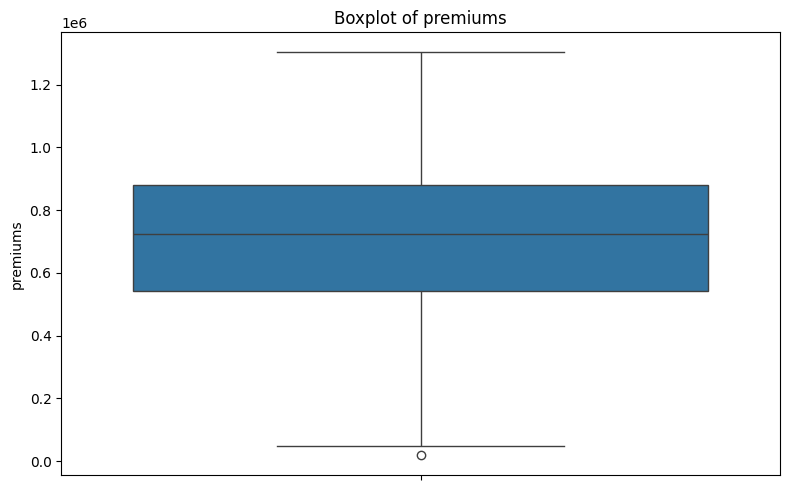

Dataset after removing outliers:
       company_code      premiums        claims  claim_premium_ratio
count         238.0  2.380000e+02  2.380000e+02           238.000000
mean         6785.0  7.346876e+05  2.320113e+05             0.327071
std             0.0  2.337679e+05  3.090800e+05             0.438598
min          6785.0  4.884296e+04 -5.812598e+05            -0.571300
25%          6785.0  5.430818e+05  5.943775e+04             0.082525
50%          6785.0  7.277413e+05  1.620686e+05             0.239550
75%          6785.0  8.799056e+05  3.613254e+05             0.471300
max          6785.0  1.302586e+06  1.974171e+06             2.430100


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


columns_to_check = ['premiums']


plt.figure(figsize=(8, 5))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(1, len(columns_to_check), i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return filtered_data

for col in columns_to_check:
    df = remove_outliers_iqr(df, col)

print(f"Dataset after removing outliers:\n{df.describe()}")


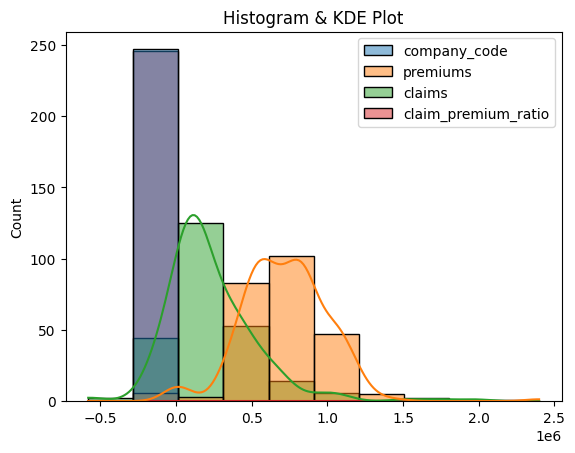

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data, kde=True, bins=10)
plt.title("Histogram & KDE Plot")
plt.show()

Checking skewness

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['premiums']] = scaler.fit_transform(data[['premiums']])

In [ ]:
from scipy.stats import skew, kurtosis
skewness = skew(data['premiums'], axis=0, nan_policy='omit')
print("Skewness:", skewness)

Skewness: 0.5934935524691912


In [ ]:
data.dtypes

,0
company_code,int64
company_name,object
product,object
state,object
premiums,float64
claims,float64
claim_premium_ratio,float64


One hot encoding

In [ ]:
df_encoded = pd.get_dummies(data, columns=['product', 'state','company_name'], drop_first=True)
display(df_encoded.head())


,company_code,premiums,claims,claim_premium_ratio
year_month_f,,,,
2003-01-01,6785,0.166598,753635.83,1.9053
2003-02-01,6785,0.147909,-18774.77,-0.0536
2003-03-01,6785,0.144303,9197.59,0.0269
2003-04-01,6785,0.181028,37382.51,0.0869
2003-05-01,6785,0.126925,102668.94,0.3421


In [ ]:
data.shape

(247, 7)

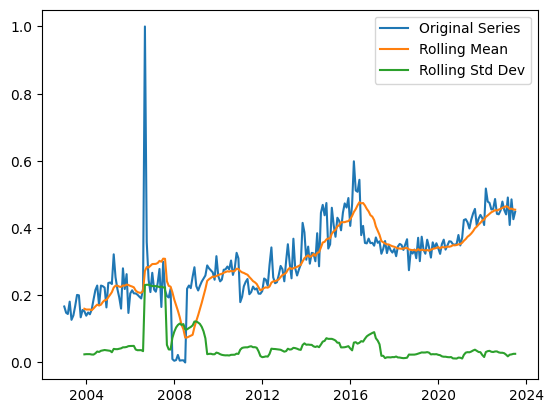

In [ ]:
import matplotlib.pyplot as plt

rolling_mean = data['premiums'].rolling(window=12).mean()
rolling_std = data['premiums'].rolling(window=12).std()

plt.plot(data['premiums'], label='Original Series')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std Dev')
plt.legend(loc='best')
plt.show()


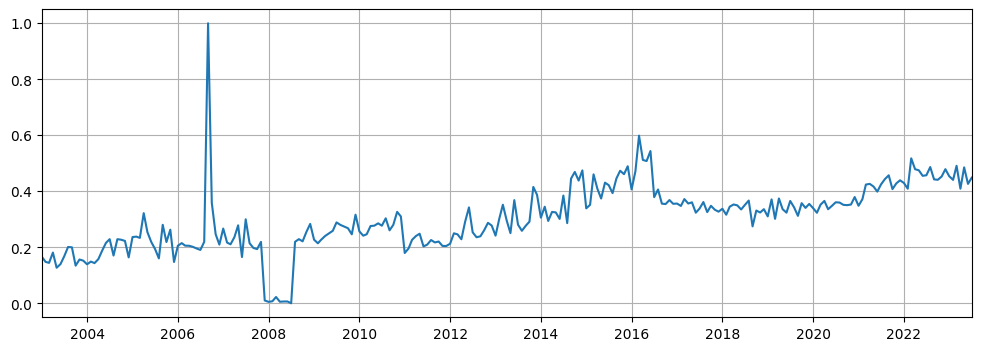

In [ ]:
plt.figure(figsize=(12,4))
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(data['premiums'])
plt.show()

Summary Statistics:
count    247.000000
mean       0.303033
std        0.118173
min        0.000000
25%        0.224288
50%        0.301516
75%        0.367605
max        1.000000
Name: premiums, dtype: float64


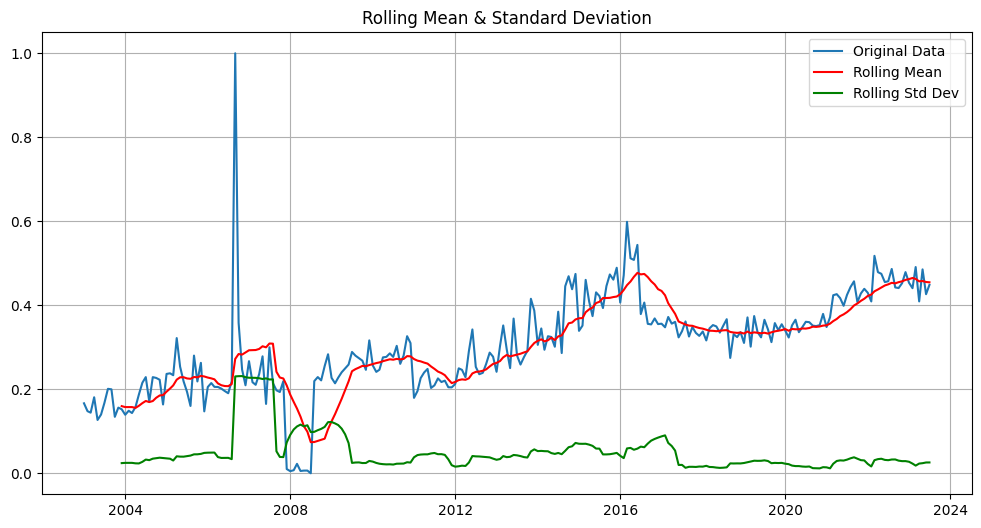

In [ ]:
# Summary statistics
print("Summary Statistics:")
print(data['premiums'].describe())

# Rolling mean and variance
rolling_mean = data['premiums'].rolling(window=12).mean()
rolling_std = data['premiums'].rolling(window=12).std()

# Plot rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(data['premiums'], label='Original Data')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std Dev', color='green')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.grid(True)
plt.show()


ADF test- to check if data is stationary and then handling it.

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(data['premiums'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Check p-value
if result[1] <= 0.05:
    print("The data is stationary.")
else:
    print("The data is not stationary. Differencing is required.")


ADF Statistic: -2.620875793756393
p-value: 0.0887589643101806
Critical Values: {'1%': -3.4575505077947746, '5%': -2.8735087323013526, '10%': -2.573148434859185}
The data is not stationary. Differencing is required.


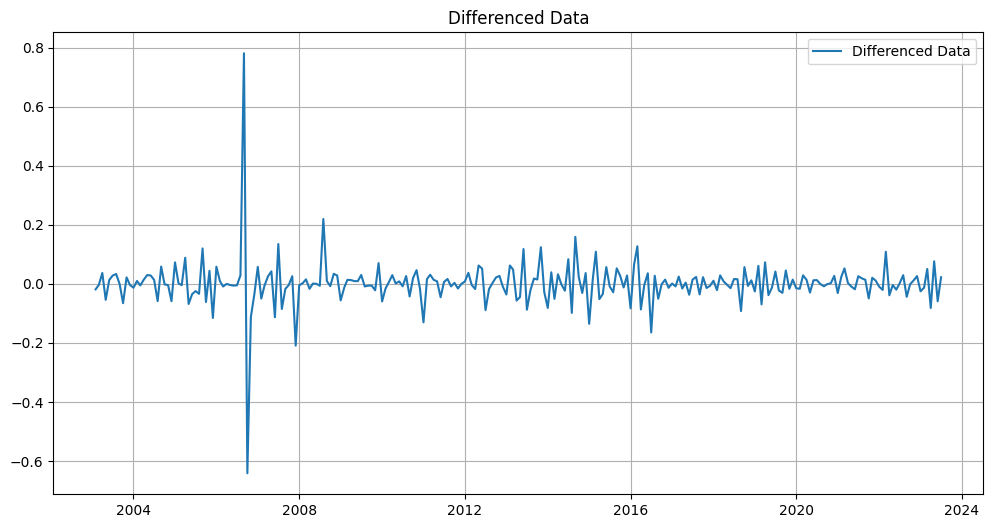

In [ ]:
data['premiums_diff'] = data['premiums'].diff().dropna()

# Plot the differenced data
plt.figure(figsize=(12, 6))
plt.plot(data['premiums_diff'], label='Differenced Data')
plt.title('Differenced Data')
plt.legend()
plt.grid(True)
plt.show()


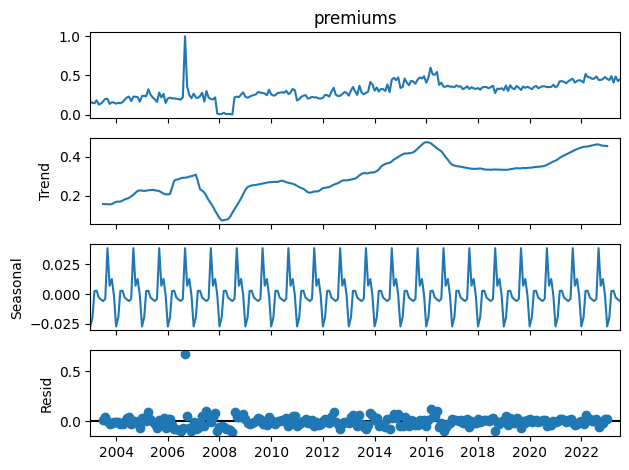

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(data['premiums'], model='additive', period=12)

# Plot decomposition
decomposition.plot()
plt.show()


Outliers detected:
              company_code                    company_name  \
year_month_f                                                 
2006-09-01            6785  BRASILSEG COMPANHIA DE SEGUROS   

                           product state  premiums   claims  \
year_month_f                                                  
2006-09-01    0993 - Vida em Grupo    TO       1.0 -5864.95   

              claim_premium_ratio  premiums_diff    zscore  
year_month_f                                                
2006-09-01                -0.0024       0.780764  5.909851  


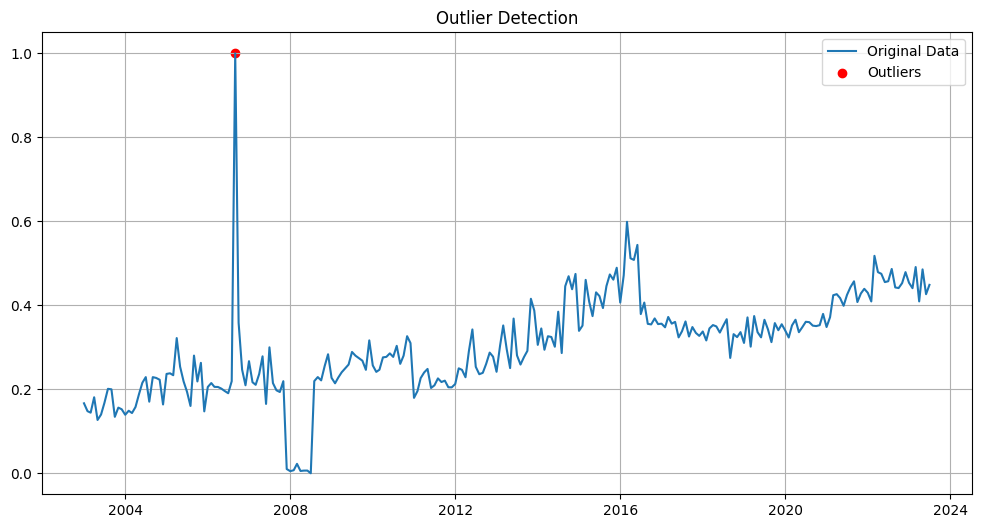

In [ ]:
# Detect outliers using Z-score
from scipy.stats import zscore

data['zscore'] = zscore(data['premiums'])
outliers = data[data['zscore'].abs() > 3]

print("Outliers detected:")
print(outliers)

# Visualize
plt.figure(figsize=(12, 6))
plt.plot(data['premiums'], label='Original Data')
plt.scatter(outliers.index, outliers['premiums'], color='red', label='Outliers')
plt.title('Outlier Detection')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Remove the outlier or handle it (for example, replace it with the mean or median)
data.loc[data['zscore'].abs() > 3, 'premiums'] = data['premiums'].median()

# Re-check stationarity
data['premiums_diff'] = data['premiums'].diff().dropna()


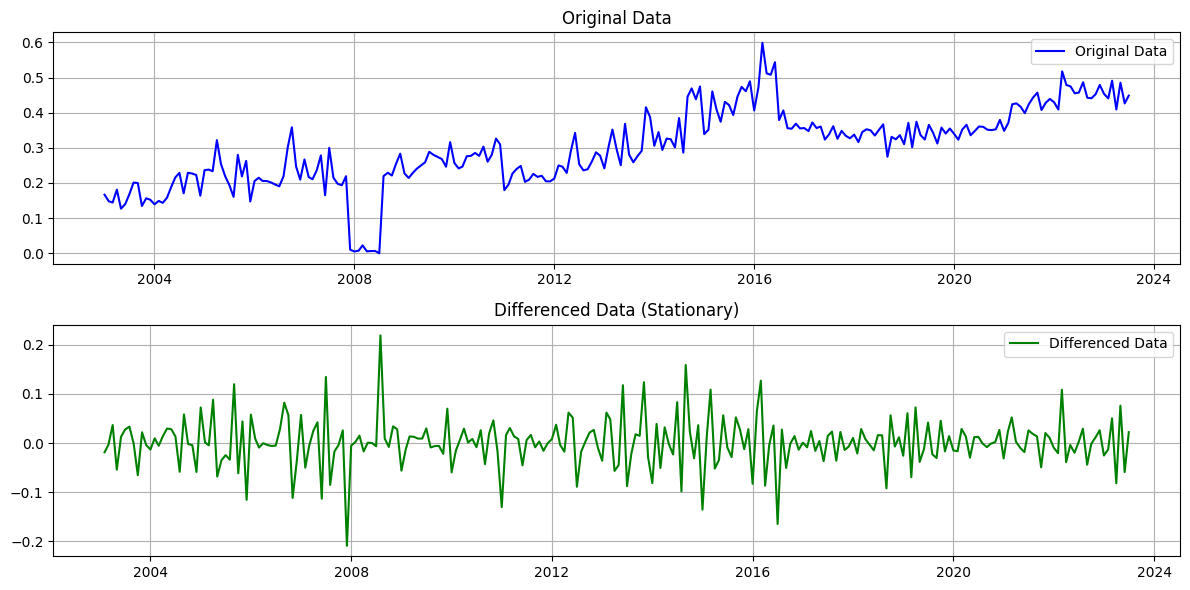

In [ ]:
# Plot the original data for comparison
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(data['premiums'], label='Original Data', color='blue')
plt.title('Original Data')
plt.legend()
plt.grid(True)

# Plot the differenced data
plt.subplot(2, 1, 2)
plt.plot(data['premiums_diff'], label='Differenced Data', color='green')
plt.title('Differenced Data (Stationary)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 29.9 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima

model = auto_arima(data['premiums'].dropna(), seasonal=True, m=12, stepwise=True, trace=True)
print(model.summary())

# Make forecasts
forecast = model.predict(n_periods=12)
print(forecast)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-808.501, Time=7.90 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-770.849, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-803.710, Time=0.96 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-813.194, Time=1.01 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-772.721, Time=0.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=-810.653, Time=0.26 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=-812.735, Time=3.49 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=-812.509, Time=5.64 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=-813.797, Time=1.87 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=-812.733, Time=4.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=-810.715, Time=4.85 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=-774.099, Time=1.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=-811.901, Time=5.60 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=-811.933, Time=1.87 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=-810.832, Time=0.78 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,0)[12]             : AIC=-815.441, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=-812.123, Time=0.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,0)[12]             : AIC=-814.402, Time=0.81 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[12]             : AIC=-814.415, Time=0.35 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12]             : AIC=-814.812, Time=0.21 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,1)[12]             : AIC=-812.477, Time=1.06 sec
 ARIMA(0,1,0)(1,0,0)[12]             : AIC=-776.009, Time=0.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,0)[12]             : AIC=-813.524, Time=0.29 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,0)[12]             : AIC=-813.550, Time=0.25 sec
 ARIMA(1,1,0)(1,0,0)[12]             : AIC=-805.536, Time=0.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,0)[12]             : AIC=-812.443, Time=0.28 sec

Best model:  ARIMA(0,1,1)(1,0,0)[12]          
Total fit time: 43.926 seconds
                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  247
Model:             SARIMAX(0, 1, 1)x(1, 0, [], 12)   Log Likelihood                 410.721
Date:                             Mon, 03 Feb 2025   AIC                           -815.441
Time:                                     17:28:17   BIC                           -804.925
Sample:                                 01-01-2003   HQIC                          -811.207
                                      - 07-01-2023                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:

from statsmodels.tsa.arima.model import ARIMA

train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Fit ARIMA model
model = ARIMA(data['premiums'], order=(1,1,1))
model_fit = model.fit()


In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               premiums   No. Observations:                  247
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 408.359
Date:                Mon, 03 Feb 2025   AIC                           -810.718
Time:                        17:28:17   BIC                           -800.202
Sample:                    01-01-2003   HQIC                          -806.484
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1141      0.132      0.863      0.388      -0.145       0.373
ma.L1         -0.5424      0.119     -4.557      0.000      -0.776      -0.309
sigma2         0.0021      0.000     18.619      0.0

In [ ]:
arima_forecast = model_fit.forecast(steps=len(test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 357ms/step - loss: 0.2022
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.1635
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1025
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0417
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0122
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0224 
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0103 
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0139 
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0127
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0114 
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0093 
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0114
Epoch 13/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0115
Epoch 14/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0115 
Epoch 15/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0126
Epoch 16/100

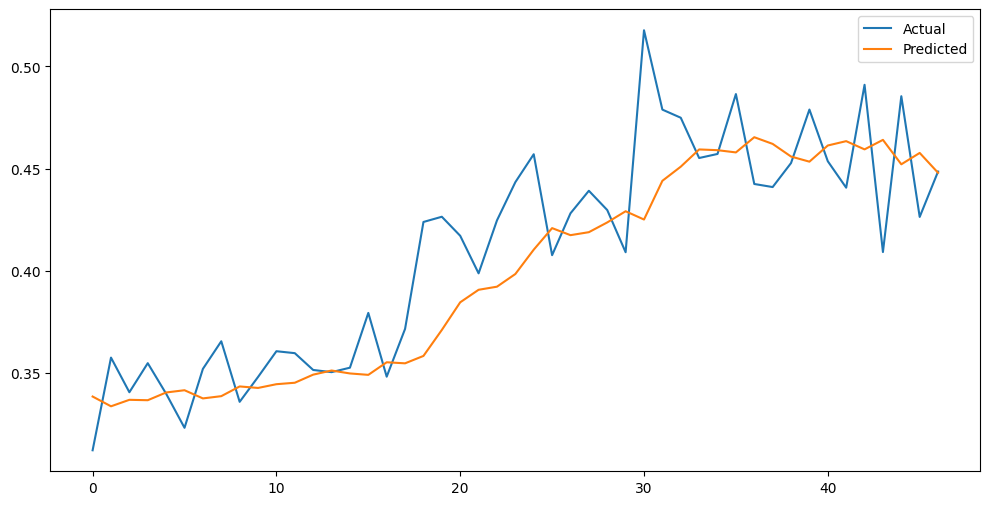

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Prepare data for LSTM
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['premiums']].values)

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 12
X, y = create_sequences(scaled_data, seq_length)

# Split into train and test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform predictions
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:
!pip install prophet

In [ ]:
# Assuming your final prepared data is in `data`
prophet_df = data[['premiums']].reset_index()  # Reset index to get 'year_month_f' as a column
prophet_df = prophet_df.rename(columns={'year_month_f': 'ds', 'premiums': 'y'})

# Drop missing values (if any)
prophet_df = prophet_df.dropna()

display(prophet_df.tail())

,ds,y
242,2023-03-01,0.491025
243,2023-04-01,0.409212
244,2023-05-01,0.485440
245,2023-06-01,0.426393
246,2023-07-01,0.448606


In [ ]:
# Keep the last 12 months as test data
train = prophet_df[:-12]
test = prophet_df[-12:]

In [ ]:
from prophet import Prophet

# Initialize and configure the model
model = Prophet(
    growth='linear',  # Type of trend ('linear' or 'logistic')
    yearly_seasonality=True,  # Auto-detect yearly seasonality
    weekly_seasonality=False,  # Disable weekly (not relevant for monthly data)
    daily_seasonality=False,
    seasonality_mode='additive',  # 'additive' or 'multiplicative'
    changepoint_prior_scale=0.05  # Flexibility to adapt to trend changes
)

# Add custom seasonality if needed (e.g., quarterly)
model.add_seasonality(name='quarterly', period=91.25, fourier_order=5)

# Fit the model
model.fit(train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpqoyn0_60/p5fyvnfr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqoyn0_60/vttl53fj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43781', 'data', 'file=/tmp/tmpqoyn0_60/p5fyvnfr.json', 'init=/tmp/tmpqoyn0_60/vttl53fj.json', 'output', 'file=/tmp/tmpqoyn0_60/prophet_modelgu2k48nf/prophet_model-20250203153944.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:39:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:39:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
model.component_modes

{'additive': ['quarterly',
  'yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
# Create a future DataFrame (including test period)
future = model.make_future_dataframe(periods=12, freq='MS')  # 'MS' = month start

# Generate predictions
forecast = model.predict(future)

# Extract predictions for the test period
test_forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)
print(test_forecast)

            ds      yhat  yhat_lower  yhat_upper
235 2022-08-01  0.606544    0.473194    0.739724
236 2022-09-01  0.569254    0.439706    0.703748
237 2022-10-01  0.592524    0.463398    0.718465
238 2022-11-01  0.591740    0.456903    0.720523
239 2022-12-01  0.570921    0.447486    0.698365
240 2023-01-01  0.503391    0.373182    0.625320
241 2023-02-01  0.522578    0.389972    0.649230
242 2023-03-01  0.545477    0.418522    0.668149
243 2023-04-01  0.596790    0.466320    0.718357
244 2023-05-01  0.548370    0.427545    0.670789
245 2023-06-01  0.516103    0.390885    0.644201
246 2023-07-01  0.569906    0.437439    0.707552


In [ ]:
# Create a future DataFrame (including test period)
future = model.make_future_dataframe(periods=365)  # 'MS' = month start
print(future.tail())
# Generate predictions
forecast = model.predict(future)

# Extract predictions for the test period
test_forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)
print(test_forecast)

            ds
595 2023-06-27
596 2023-06-28
597 2023-06-29
598 2023-06-30
599 2023-07-01
            ds      yhat  yhat_lower  yhat_upper
588 2023-06-20  0.427429    0.302984    0.558494
589 2023-06-21  0.440224    0.315952    0.562894
590 2023-06-22  0.456806    0.330533    0.575427
591 2023-06-23  0.476351    0.350017    0.604647
592 2023-06-24  0.497718    0.376462    0.619928
593 2023-06-25  0.519499    0.386303    0.648175
594 2023-06-26  0.540098    0.414614    0.673169
595 2023-06-27  0.557831    0.431210    0.685152
596 2023-06-28  0.571039    0.444017    0.691790
597 2023-06-29  0.578218    0.445264    0.713856
598 2023-06-30  0.578130    0.452252    0.710082
599 2023-07-01  0.569906    0.442715    0.702834


In [ ]:
display(forecast.tail(12))

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,quarterly,quarterly_lower,quarterly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
235,2022-08-01,0.454712,0.473194,0.739724,0.454712,0.454712,0.151832,0.151832,0.151832,0.077038,0.077038,0.077038,0.074795,0.074795,0.074795,0.0,0.0,0.0,0.606544
236,2022-09-01,0.453078,0.439706,0.703748,0.453060,0.453078,0.116176,0.116176,0.116176,0.132384,0.132384,0.132384,-0.016208,-0.016208,-0.016208,0.0,0.0,0.0,0.569254
237,2022-10-01,0.451497,0.463398,0.718465,0.451366,0.451562,0.141027,0.141027,0.141027,0.110547,0.110547,0.110547,0.030481,0.030481,0.030481,0.0,0.0,0.0,0.592524
238,2022-11-01,0.449863,0.456903,0.720523,0.449545,0.450071,0.141878,0.141878,0.141878,0.087116,0.087116,0.087116,0.054762,0.054762,0.054762,0.0,0.0,0.0,0.591740
239,2022-12-01,0.448281,0.447486,0.698365,0.447693,0.448672,0.122640,0.122640,0.122640,0.132172,0.132172,0.132172,-0.009532,-0.009532,-0.009532,0.0,0.0,0.0,0.570921
240,2023-01-01,0.446647,0.373182,0.625320,0.445758,0.447224,0.056743,0.056743,0.056743,0.113339,0.113339,0.113339,-0.056596,-0.056596,-0.056596,0.0,0.0,0.0,0.503391
241,2023-02-01,0.445014,0.389972,0.649230,0.443875,0.445792,0.077565,0.077565,0.077565,0.095797,0.095797,0.095797,-0.018232,-0.018232,-0.018232,0.0,0.0,0.0,0.522578
242,2023-03-01,0.443538,0.418522,0.668149,0.442077,0.444576,0.101939,0.101939,0.101939,0.125990,0.125990,0.125990,-0.024050,-0.024050,-0.024050,0.0,0.0,0.0,0.545477
243,2023-04-01,0.441904,0.466320,0.718357,0.440055,0.443202,0.154886,0.154886,0.154886,0.106669,0.106669,0.106669,0.048217,0.048217,0.048217,0.0,0.0,0.0,0.596790
244,2023-05-01,0.440323,0.427545,0.670789,0.438138,0.441923,0.108048,0.108048,0.108048,0.066033,0.066033,0.066033,0.042014,0.042014,0.042014,0.0,0.0,0.0,0.548370


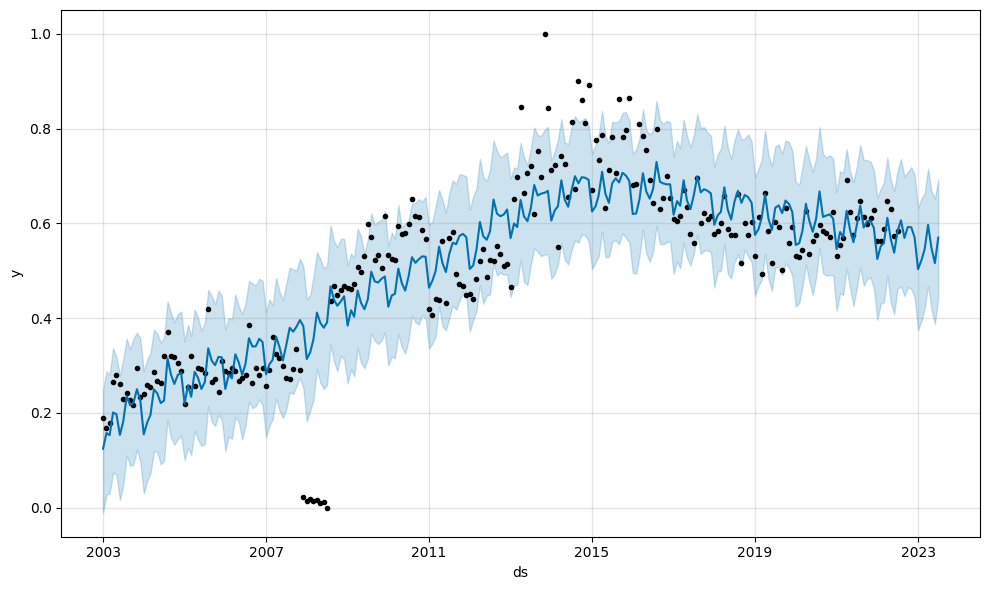

In [ ]:
fig1 = model.plot(forecast)

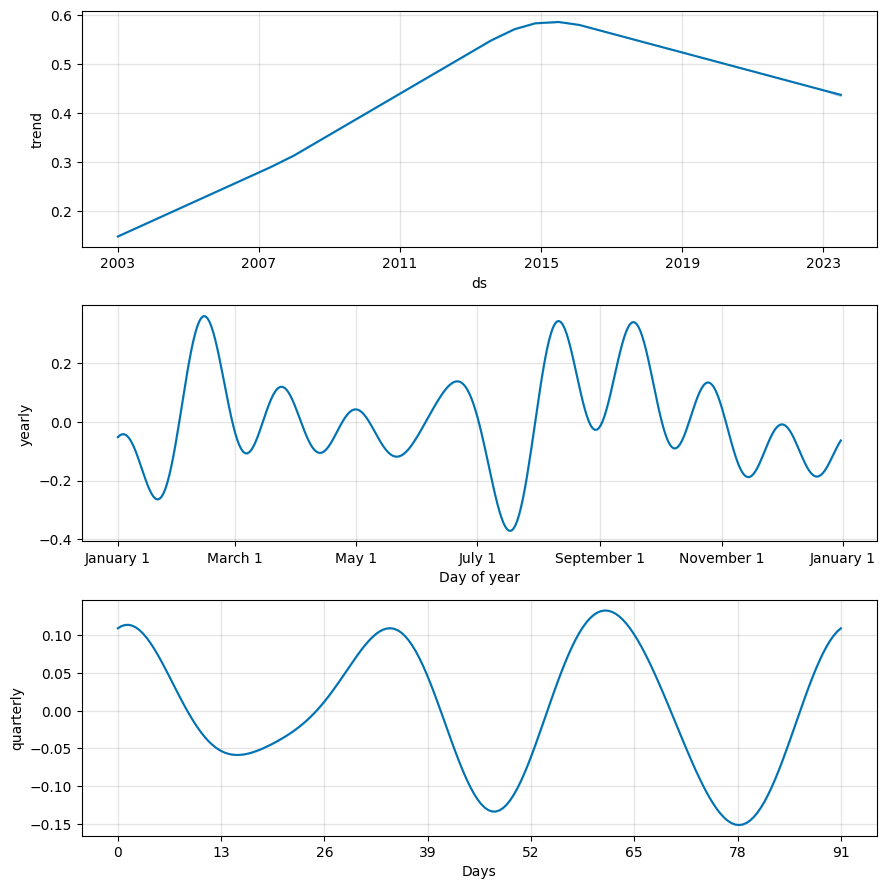

In [ ]:
fig2 = model.plot_components(forecast)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [ ]:
plot_components_plotly(model, forecast)



/usr/local/lib/python3.11/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Align test data with forecasts
test = test.set_index('ds')
test_forecast = test_forecast.set_index('ds')

# Scale y values by 1000
test['y'] = test['y'] * 1000
test_forecast['yhat'] = test_forecast['yhat'] * 1000

# Calculate metrics
mae = mean_absolute_error(test['y'], test_forecast['yhat'])
rmse = mean_squared_error(test['y'], test_forecast['yhat'])
mape = np.mean(np.abs((test['y'] - test_forecast['yhat']) / test['y'])) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

MAE: 28.10
RMSE: 1476.45
MAPE: 4.74%


In [ ]:
print(test['y'].describe())

count     12.000000
mean     581.018009
std       38.331917
min      522.609015
25%      551.402677
50%      580.263014
75%      597.324443
max      664.615362
Name: y, dtype: float64


In [ ]:
# prompt: explain all code

import pandas as pd
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew, kurtosis
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import zscore
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from sklearn.metrics import mean_absolute_error, mean_squared_error

%matplotlib inline

# This relates to plotting datetime values with matplotlib:
register_matplotlib_converters()

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/insurance_dataset.csv.zip")

# Display descriptive statistics and information about the DataFrame
df.describe()
df.info()

# Data exploration and cleaning
# Grouping data by company, product and state, and counting occurrences
grouping_cnt = df.groupby(['company_code', 'product','state']).size()
display(grouping_cnt)

# Grouping data by company, product and state, aggregating premiums by count
new = df.groupby(['company_code', 'product','state'])['premiums'].agg('count').reset_index()
sorted_result = new.sort_values(by='premiums',ascending=False).reset_index(drop=True)
display(sorted_result)

# Grouping data by company and product, aggregating premiums by count
new_grp = df.groupby(['company_code', 'product'])['premiums'].agg('count').reset_index()
sorted_result2 = new_grp.sort_values(by='premiums',ascending=False).reset_index(drop=True)
display(sorted_result2)


# Filtering data based on user input and specific criteria
states = ['TO', 'SP', 'RJ', 'MG', 'BA']
user_state = input("Enter state: ").strip().upper()
filtered_data_list = []

if user_state in states:
    filtered_df = df[
        (df['company_code'] == 6785) &
        (df['product'] == '0993 - Vida em Grupo') &
        (df['state'] == user_state)
    ]
    filtered_data_list.append(filtered_df)

if filtered_data_list:
    for data in filtered_data_list:
        display(data.sort_values(by='year_month'))
else:
    print("No data found for the entered state or invalid state input.")


# Data preprocessing
data.loc[:, 'year_month_f'] = pd.to_datetime(data['year_month'])
data.set_index('year_month_f',inplace=True)
data.drop("year_month",axis='columns',inplace=True)
data.sort_index(inplace=True)
data = data.asfreq("MS")  # Fill in missing months with NaN

# Handle missing values (if any)
missing_values = data.isna().sum()
print(missing_values)

# Outlier handling
# ... (Outlier detection and removal using IQR and boxplots)

# Skewness handling
scaler = MinMaxScaler()
data[['premiums']] = scaler.fit_transform(data[['premiums']])
skewness = skew(data['premiums'], axis=0, nan_policy='omit')
print("Skewness:", skewness)

# One-hot encoding
df_encoded = pd.get_dummies(data, columns=['product', 'state','company_name'], drop_first=True)
display(df_encoded.head())


# Time series analysis and visualization
# ... (Rolling mean, standard deviation, stationarity check, differencing, decomposition)

# Outlier detection using Z-score and handling (removal or replacement)
# ... (Outlier detection using z-score, visualization, and handling)

# Model training
# ... (Auto ARIMA, ARIMA, LSTM, Prophet model fitting and prediction)

# Model evaluation
# ... (Evaluation metrics calculation for Prophet model)
